In [3]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import cv2

In [4]:
img = cv2.imread(r'C:\Users\Eduardo\Pictures\Photoshop\old_traford.jpg')

In [5]:
img = img [:,:,[2,1,0]]

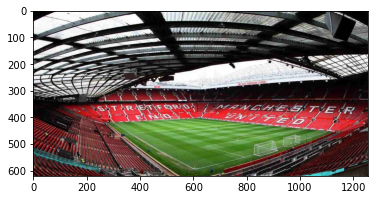

In [6]:
plt.imshow(img)

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

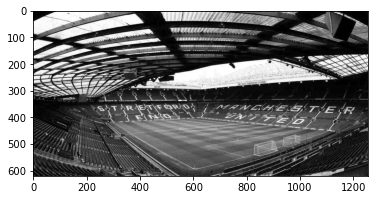

In [8]:
plt.imshow(img_gray, cmap="gray")

In [9]:
def BGR2GRAY(image):
    img_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return img_gray
    

In [10]:
imagen_gris = BGR2GRAY(img)

In [11]:
from scipy import signal
def average_filter(image,N):
    kernel = np.ones((N,N))/(N*N)
    #signal.convolve2d(in1, in2, "same"=salida mismo tamaño que in1, "symm"= condiciones de limite simetricas)
    return signal.convolve2d(image[:,:,0], kernel,mode='same' ,boundary='symm')

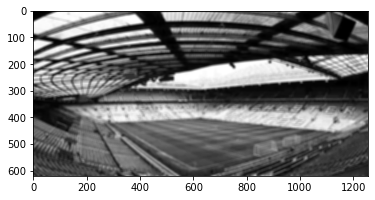

In [12]:
plt.imshow(average_filter(img,10), cmap="gray")

In [13]:
from scipy.ndimage import gaussian_filter
def gauss_filter(image, N, s):
    t=(((N - 1)/2)-0.5)/s
    return gaussian_filter(image[:,:,[2,1,0]], sigma=s, truncate=t)

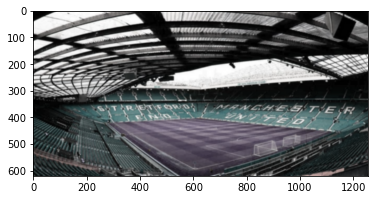

In [14]:
plt.imshow(gauss_filter(img,5,5), cmap="gray")

In [15]:
def sobel_filter(image):
    #cv2.Sobel(imagen, 32 bits flotante, derivada en x, derivada en y)
    gx = cv2.Sobel(image[:,:,0], cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(image[:,:,0], cv2.CV_32F, 0, 1)
    
    mag, ang = cv2.cartToPolar(gx, gy)
    return mag


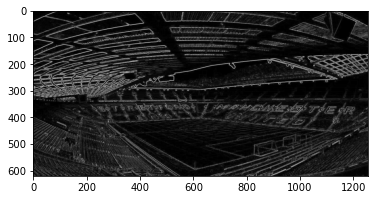

In [16]:
plt.imshow(sobel_filter(img), cmap="gray")

In [65]:
def histograma(image):
    #si las dimensiones de la imagen son 2 es gris
    if len(image.shape)==2:
        #calcula el histograma convirtiendolo a arreglo
        #cv2.calcHist(imagen,dimension a calcular(bgr),"None"=Toda la imagen,Tamaño del histograma,Rango del histograma)
        hist = cv2.calcHist([image],[0],None,[256],[0,256])
        #Para graficar en python
        plt.plot(hist)
    elif image.shape[2]==3:
            #BGR
            
            for i,col in enumerate(('b','g','r')):
                hist = cv2.calcHist([image],[i],None,[256],[0,256])
                #Para graficar en python
                plt.plot(hist,color = col)
                plt.xlim([0,255])
                
                
    return hist



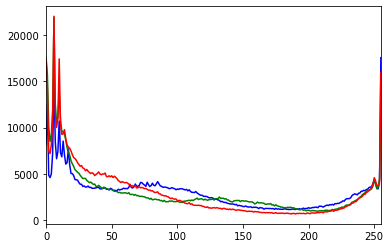

In [74]:
histogram=histograma(img)
plt.plot(histogram[0],color='b')
plt.plot(histogram[1],color='g')
plt.plot(histogram[2],color='r')


In [87]:
def Equalize(image):
    if len(image.shape)==2:
        imgEqualized = cv2.equalizeHist(image)
        
    elif image.shape[2]==3:
        #Se convierte de BGR a YUV
        imageyuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
        #Se aplica la ecualizacion en YUV
        imageyuv[:,:,0] = cv2.equalizeHist(imageyuv[:,:,0])
        #Se transforma a BGR otra vez
        imgEqualized = cv2.cvtColor(imageyuv, cv2.COLOR_YUV2BGR)
        
    return imgEqualized
    



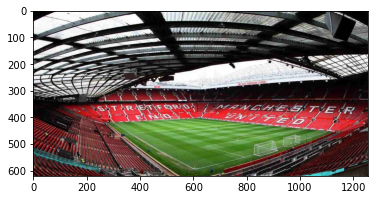

In [88]:
plt.imshow(img)


array([[17302.],
       [14373.],
       [ 7459.],
       [ 7197.],
       [ 8120.],
       [10760.],
       [22025.],
       [11465.],
       [10025.],
       [10959.],
       [17422.],
       [10248.],
       [ 9266.],
       [ 9327.],
       [ 9776.],
       [ 8780.],
       [ 8131.],
       [ 7885.],
       [ 7776.],
       [ 7466.],
       [ 7082.],
       [ 6763.],
       [ 6667.],
       [ 6476.],
       [ 6203.],
       [ 6010.],
       [ 5829.],
       [ 5903.],
       [ 5644.],
       [ 5576.],
       [ 5339.],
       [ 5481.],
       [ 5279.],
       [ 5154.],
       [ 5042.],
       [ 5126.],
       [ 5038.],
       [ 4824.],
       [ 4928.],
       [ 5044.],
       [ 5216.],
       [ 4990.],
       [ 4908.],
       [ 5005.],
       [ 4967.],
       [ 5099.],
       [ 4707.],
       [ 4699.],
       [ 4797.],
       [ 4692.],
       [ 4795.],
       [ 4608.],
       [ 4755.],
       [ 4636.],
       [ 4497.],
       [ 4279.],
       [ 4183.],
       [ 4065.],
       [ 4174.

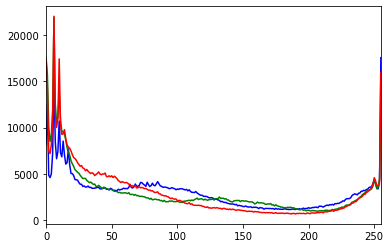

In [86]:
histograma(img)

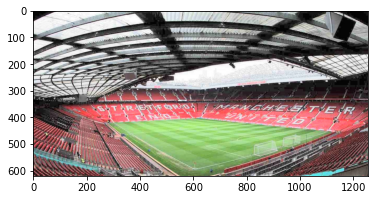

In [84]:
plt.imshow(Equalize(img))

array([[5.7670e+03],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [1.9020e+03],
       [1.3148e+04],
       [2.1030e+03],
       [4.7820e+03],
       [2.6060e+03],
       [4.2060e+03],
       [8.6700e+02],
       [8.8700e+02],
       [2.2510e+03],
       [4.1880e+03],
       [1.2550e+03],
       [3.1140e+03],
       [5.7600e+02],
       [7.3940e+03],
       [2.1390e+03],
       [7.4000e+02],
       [1.3200e+03],
       [6.2400e+02],
       [1.0690e+03],
       [1.5425e+04],
       [1.3820e+03],
       [1.4920e+03],
       [1.5880e+03],
       [6.9250e+03],
       [1.5660e+03],
       [1.5800e+03],
       [1.6890e+03],
       [5.3710e+03],
       [1.6290e+03],
       [4.0540e+03],
       [9.0800e+02],
       [6.5710e+03],
       [2.0330e+03],
       [1.7040e+03],
       [1.4870e+03],
       [7.1100e+02],
       [1.0264e+04],
       [2.0590e+03],
       [1.5410e+03],
       [6.1750e+03],
       [1.9640e+03],
       [1.6070e+03],
       [5.4950e+03],
       [2.105

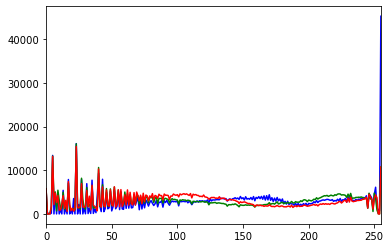

In [85]:
histograma(Equalize(img))